## Exercise 1: Logistic regression with Scikit-learn

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [7]:
X = np.array([[0],[0.1],[0.2], [1],[1.1],[1.2], [1.3]])
y = np.array([0,0,0,1,1,1,0])

In [8]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X, y)

LogisticRegression()

In [9]:
x_pred = np.array([[0.5]])
pred_class = clf.predict(x_pred)
print("Predicted class for x_pred:", pred_class)
print("Predicted class for x_pred:", pred_class[0])

Predicted class for x_pred: [0]
Predicted class for x_pred: 0


In [10]:
pred_proba = clf.predict_proba(x_pred)[0]
print("Predicted probabilities for x_pred:", pred_proba)

Predicted probabilities for x_pred: [0.61450206 0.38549794]


In [11]:
print("Coefficient:\n", clf.coef_)
print("Intercept:\n", clf.intercept_)
print("Score:\n", clf.score(X, y))

Coefficient:
 [[0.81793264]]
Intercept:
 [-0.87524276]
Score:
 0.7142857142857143


## Exercise 2: Sigmoid

In [12]:
import numpy as np
import matplotlib.pyplot as plt

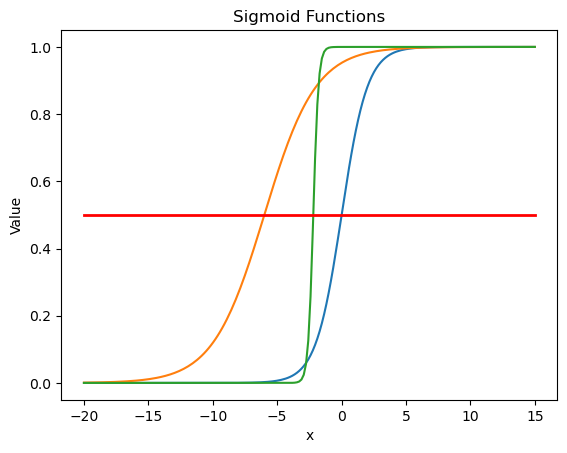

In [13]:
x = np.linspace(-20, 15, 200)
sigmoid = 1 / (1 + np.exp(-x))
sigmoid1 = 1 / (1 + np.exp(-(0.5 * x + 3)))
sigmoid2 = 1 / (1 + np.exp(-(5 * x + 11)))

plt.plot(x, sigmoid, label='sigmoid(x)')
plt.plot(x, sigmoid1, label='sigmoid1(x) = 1/(1+exp(-(0.5x+3)))')
plt.plot(x, sigmoid2, label='sigmoid2(x) = 1/(1+exp(-(5x+11)))')
plt.plot([-20, 15], [0.5, 0.5], color='red', linewidth=2)  # horizontal red line at y=0.5
plt.title("Sigmoid Functions")
plt.xlabel("x")
plt.ylabel("Value")

plt.show()

## Exercise 3: Decision boundary

In [14]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5,0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)

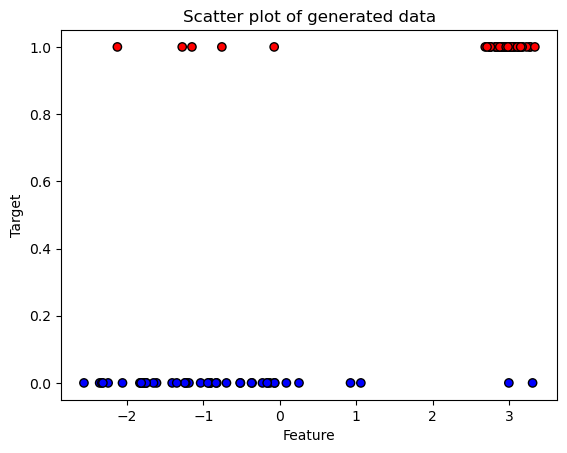

In [15]:
plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Scatter plot of generated data')
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

print("Coefficient:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficient: [[1.18885765]]
Intercept: [-0.98497516]


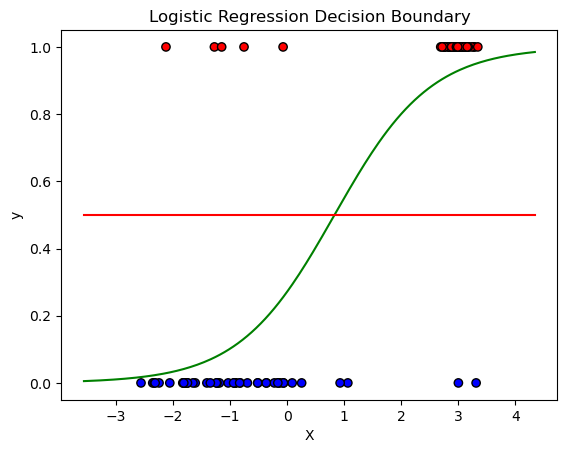

In [17]:
x_plot = np.linspace(X.min()-1, X.max()+1, 200).reshape(-1, 1)
y_prob = clf.predict_proba(x_plot)[:, 1]

plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k', label='Data')
plt.plot(x_plot, y_prob, color='green', label='Fitted sigmoid')
plt.plot([X.min()-1, X.max()+1], [0.5, 0.5], color='red', linestyle='-', label='0.5 probability line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [18]:
def predict_probability(coefs, X):
    a, b = coefs
    X = X.reshape(-1)
    probabilities = 1 / (1 + np.exp(-(a * X + b)))
    return probabilities

In [19]:
manual_probs = predict_probability([clf.coef_[0][0], clf.intercept_[0]], X)
sklearn_probs = clf.predict_proba(X)[:, 1]
print("Manual probabilities match sklearn:", np.allclose(manual_probs, sklearn_probs))

Manual probabilities match sklearn: True


In [20]:
def predict_class(coefs, X):
    a, b = coefs
    X = X.reshape(-1)
    probabilities = 1 / (1 + np.exp(-(a * X + b)))
    classes = (probabilities >= 0.5).astype(int)
    return classes

In [21]:
manual_classes = predict_class([clf.coef_[0][0], clf.intercept_[0]], X)
sklearn_classes = clf.predict(X)
print("Manual classes match sklearn:", np.array_equal(manual_classes, sklearn_classes))

Manual classes match sklearn: True


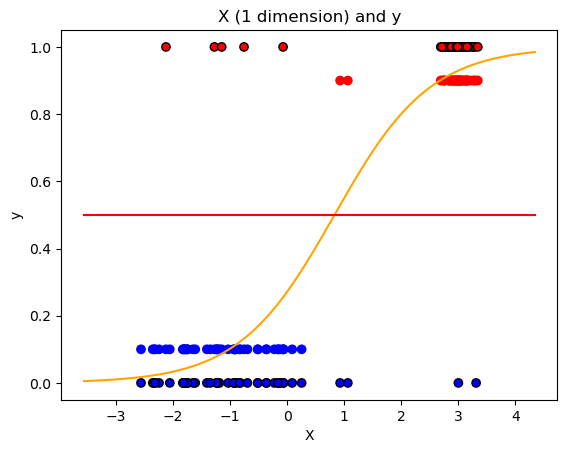

In [22]:
plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k', label='True class')
plt.plot(x_plot, y_prob, color='orange', label='Fitted sigmoid')
plt.plot([X.min()-1, X.max()+1], [0.5, 0.5], color='red', linestyle='-', label='0.5 probability line')

plt.scatter(X, manual_classes * 0.8 + 0.1, c=manual_classes, cmap='bwr', marker='o', label='Predicted class (shifted)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('X (1 dimension) and y')
plt.show()

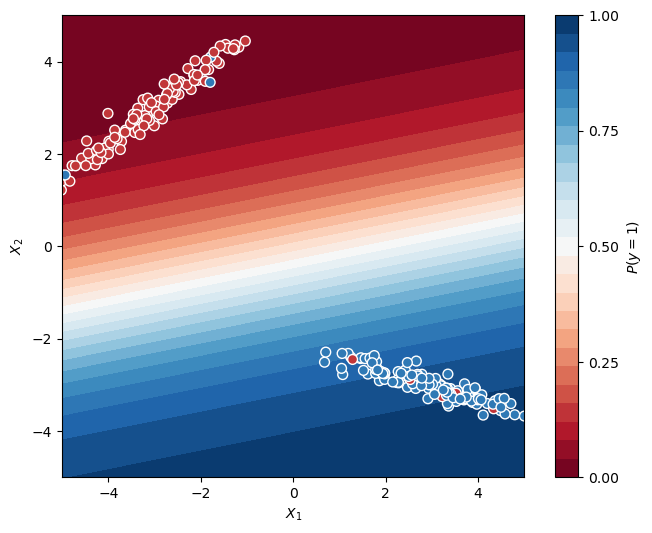

In [23]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D data
X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_samples=250,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.05,
    class_sep=3,
    random_state=43
)

# Fit logistic regression
clf = LogisticRegression()
clf.fit(X, y)

# Create grid for contour plot
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")
plt.show()

## Exercise 4: Train test split

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

In [25]:
X = np.arange(1, 21).reshape(10, -1)
y = np.zeros(10)
y[7:] = 1

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [27]:
print("X_train:\n", X_train)
print("y_train:", y_train)
print("X_test:\n", X_test)
print("y_test:", y_test)

X_train:
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]]
y_train: [0. 0. 0. 0. 0. 0. 0. 1.]
X_test:
 [[17 18]
 [19 20]]
y_test: [1. 1.]


In [28]:
X = np.arange(1, 201).reshape(100, -1)
y = np.zeros(100)
y[70:] = 1

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
print("Proportion of class 1 in train:", np.mean(y_train))
print("Proportion of class 1 in test:", np.mean(y_test))

Proportion of class 1 in train: 0.3
Proportion of class 1 in test: 0.3


## Exercise 5: Breast Cancer prediction

In [31]:
import pandas as pd
import numpy as np

columns = [
    "Sample_code_number", "Clump_Thickness", "Uniformity_Cell_Size", "Uniformity_Cell_Shape",
    "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei",
    "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"
]

df = pd.read_csv("breast-cancer-wisconsin.data", names=columns)

In [32]:
print("First 5 rows:\n", df.head())

First 5 rows:
    Sample_code_number  Clump_Thickness  Uniformity_Cell_Size  \
0             1000025                5                     1   
1             1002945                5                     4   
2             1015425                3                     1   
3             1016277                6                     8   
4             1017023                4                     1   

   Uniformity_Cell_Shape  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                      1                  1                            2   
1                      4                  5                            7   
2                      1                  1                            2   
3                      8                  1                            3   
4                      1                  3                            2   

  Bare_Nuclei  Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0           1                3                1        1      2  
1          

In [33]:
print("\nData shape:", df.shape)


Data shape: (699, 11)


In [34]:
print("\nMissing values per column:\n", df.isin(['?']).sum())


Missing values per column:
 Sample_code_number              0
Clump_Thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [35]:
print(df.dtypes)

Sample_code_number              int64
Clump_Thickness                 int64
Uniformity_Cell_Size            int64
Uniformity_Cell_Shape           int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [36]:
df.replace('?', np.nan, inplace=True)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median())

df = df.drop("Sample_code_number", axis=1)

/tmp/ipykernel_2263/2176110650.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [37]:
print("Any missing values left?\n", df.isnull().sum())

Any missing values left?
 Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [38]:
print("\nData types:\n", df.dtypes)


Data types:
 Clump_Thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object


In [39]:
prop_benign = np.mean(df['Class'] == 2)

In [40]:
print("Proportion of class Benign:", prop_benign)

Proportion of class Benign: 0.6552217453505007


In [41]:
print("Accuracy if always predict Benign:", prop_benign)

Accuracy if always predict Benign: 0.6552217453505007


In [42]:
print("Class distribution:\n", df['Class'].value_counts())

Class distribution:
 Class
2    458
4    241
Name: count, dtype: int64


In [43]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43, stratify=y
)

print("Proportion of class Benign in train:", np.mean(y_train == 2))
print("Proportion of class Benign in test:", np.mean(y_test == 2))
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Proportion of class Benign in train: 0.6547406082289803
Proportion of class Benign in test: 0.6571428571428571
Train set shape: (559, 9)
Test set shape: (140, 9)


In [44]:

from sklearn.linear_model import LogisticRegression

# Logistic regression expects binary targets; map 2->0 (Benign), 4->1 (Malignant)
y_train_bin = (y_train == 4).astype(int)
y_test_bin = (y_test == 4).astype(int)

clf = LogisticRegression(max_iter=1000, random_state=43)
clf.fit(X_train, y_train_bin)

# Show first 10 predictions and probabilities for train set
print("# Train")
print("Class prediction on train set:\n", clf.predict(X_train)[:10])
print("\nProbability prediction on train set:\n", clf.predict_proba(X_train)[:10, 1])
print("\nScore on train set:\n", clf.score(X_train, y_train_bin))

# Show first 10 predictions and probabilities for test set
print("\n# Test")
print("Class prediction on test set:\n", clf.predict(X_test)[:10])
print("\nProbability prediction on test set:\n", clf.predict_proba(X_test)[:10, 1])
print("\nScore on test set:\n", clf.score(X_test, y_test_bin))

# Train
Class prediction on train set:
 [1 0 1 0 0 0 0 1 0 0]

Probability prediction on train set:
 [0.99600525 0.00908951 0.99992741 0.00528932 0.02098032 0.00582947
 0.03566504 0.99515453 0.00788556 0.01065907]

Score on train set:
 0.9695885509838998

# Test
Class prediction on test set:
 [0 0 0 1 0 1 0 0 0 1]

Probability prediction on test set:
 [0.01747894 0.22504709 0.00699085 0.54019127 0.00152929 0.9986223
 0.33611399 0.01228123 0.00438318 0.99972361]

Score on test set:
 0.9642857142857143


In [45]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

# Map 0 -> 2 (Benign), 1 -> 4 (Malignant)
train_pred_orig = np.where(train_pred == 0, 2, 4)
test_pred_orig = np.where(test_pred == 0, 2, 4)

print("# Train")
print("Class prediction on train set:\n", train_pred_orig[:10])
print("\nProbability prediction on train set:\n", clf.predict_proba(X_train)[:10, 1])
print("\nScore on train set:\n", clf.score(X_train, y_train_bin))

print("\n# Test")
print("Class prediction on test set:\n", test_pred_orig[:10])
print("\nProbability prediction on test set:\n", clf.predict_proba(X_test)[:10, 1])
print("\nScore on test set:\n", clf.score(X_test, y_test_bin))

# Train
Class prediction on train set:
 [4 2 4 2 2 2 2 4 2 2]

Probability prediction on train set:
 [0.99600525 0.00908951 0.99992741 0.00528932 0.02098032 0.00582947
 0.03566504 0.99515453 0.00788556 0.01065907]

Score on train set:
 0.9695885509838998

# Test
Class prediction on test set:
 [2 2 2 4 2 4 2 2 2 4]

Probability prediction on test set:
 [0.01747894 0.22504709 0.00699085 0.54019127 0.00152929 0.9986223
 0.33611399 0.01228123 0.00438318 0.99972361]

Score on test set:
 0.9642857142857143


In [46]:
print("All test set predictions (2=benign, 4=malignant):")
print(test_pred_orig)

All test set predictions (2=benign, 4=malignant):
[2 2 2 4 2 4 2 2 2 4 4 4 2 2 4 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 2 4 2 2 4 2 2
 2 4 2 4 4 2 2 2 2 2 2 4 2 4 2 2 2 4 4 2 4 2 4 2 2 2 2 4 2 2 4 4 2 2 2 2 2
 2 2 4 2 2 2 2 4 2 4 4 4 2 2 2 4 4 4 2 4 2 4 4 4 2 2 2 2 2 2 4 4 4 2 2 2 2
 4 2 2 2 2 4 2 2 2 2 4 2 2 4 4 2 4 2 2 4 4 2 2 2 2 4 2 2 2]
